In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tools as tl
import matplotlib.pyplot as plt
import matplo0tlib.colors as clt
import matplotlib.animation as animation
import re

sns.set_style("ticks")

colors =['#b75c83', '#9cd8a8','#2f9090']
success_palette = sns.set_palette(sns.color_palette(colors))

path = './figures/paper/5_grazing_bifurcation/'
extension = '.png'

top_directory = "./output/" #os.getcwd()
files, runs = tl.view_runs(top_directory)

### Grazing = .51

In [10]:
grazing = 51
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['number_of_timesteps']==3000)&
              (runs['number_of_rows']==25)&
              (runs['grazing']==grazing)&
              (runs['grid_option']==0)&
              (runs['initial_coral_percent']==33)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
5,25,25,0,51,145,33,33,10,40,20,75,3000,10,100,5


In [11]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)

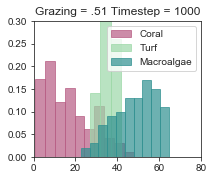

In [12]:
timestep = 1000
name='Hist_species_histogram_grazing_' + str(grazing) + '_timestep_' + str(timestep)

coral = df[(df['timestep']==timestep)&(df['coral_percent']!=0)]['coral_percent']
turf = df[(df['timestep']==timestep)&(df['turf_percent']!=0)]['turf_percent']
macroalgae = df[(df['timestep']==timestep)&(df['macroalgae_percent']!=0)]['macroalgae_percent']

weights_coral = np.ones_like(np.array(coral))/float(len(np.array(coral)))
weights_turf = np.ones_like(np.array(turf))/float(len(np.array(turf)))
weights_macroalgae = np.ones_like(np.array(macroalgae))/float(len(np.array(macroalgae)))


plt.figure(figsize=(3,2.5))
plt.hist(coral, color='#b75c83',edgecolor='#b75c83',weights=weights_coral, label="Coral", alpha=.7, bins=10)
plt.hist(turf, color='#9cd8a8',edgecolor='#9cd8a8',weights=weights_turf, label="Turf", alpha=.7, bins=3)
plt.hist(macroalgae, color='#2f9090',edgecolor='#2f9090', weights=weights_macroalgae, label="Macroalgae", alpha=.7, bins=10)


#plt.xlabel("Coral Percent", size=14)
#plt.ylabel("Count", size=14)

plt.title("Grazing = ." + str(grazing) + ' Timestep = ' + str(timestep))
plt.axis((0,80,0,.3))
plt.legend(loc='upper right')
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

### Grazing = .54

In [5]:
grazing = 54
subset = runs[(runs['neighborhood_threshold']==145)&
              (runs['number_of_timesteps']==3000)&
              (runs['number_of_rows']==25)&
              (runs['grazing']==grazing)&
              (runs['grid_option']==0)&
              (runs['initial_coral_percent']==33)]
subset

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
13,25,25,0,54,145,33,33,10,40,20,75,3000,10,100,13


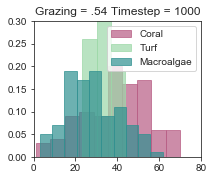

In [6]:
df = tl.load_runs(files, subset)
df = tl.split_neighbors(df)
df = tl.add_percent(df)

timestep = 1000
name='Hist_species_histogram_grazing_' + str(grazing) + '_timestep_' + str(timestep)

coral = df[(df['timestep']==timestep)&(df['coral_percent']!=0)]['coral_percent']
turf = df[(df['timestep']==timestep)&(df['turf_percent']!=0)]['turf_percent']
macroalgae = df[(df['timestep']==timestep)&(df['macroalgae_percent']!=0)]['macroalgae_percent']

weights_coral = np.ones_like(np.array(coral))/float(len(np.array(coral)))
weights_turf = np.ones_like(np.array(turf))/float(len(np.array(turf)))
weights_macroalgae = np.ones_like(np.array(macroalgae))/float(len(np.array(macroalgae)))


plt.figure(figsize=(3,2.5))
plt.hist(coral, color='#b75c83',edgecolor='#b75c83',weights=weights_coral, label="Coral", alpha=.7, bins=10)
plt.hist(turf, color='#9cd8a8',edgecolor='#9cd8a8',weights=weights_turf, label="Turf", alpha=.7, bins=3)
plt.hist(macroalgae, color='#2f9090',edgecolor='#2f9090', weights=weights_macroalgae, label="Macroalgae", alpha=.7, bins=10)


#plt.xlabel("Coral Percent", size=14)
#plt.ylabel("Count", size=14)

plt.title("Grazing = ." + str(grazing) + ' Timestep = ' + str(timestep))
plt.axis((0,80,0,.3))
plt.legend(loc='upper right')
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

----
### With KDE
___

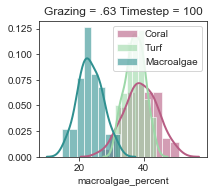

In [84]:
timestep = 100

name='species_histogram_grazing_' + str(grazing) + '_timestep_' + str(timestep)

coral = df[(df['timestep']==timestep)&(df['coral_percent']!=0)]['coral_percent']
turf = df[(df['timestep']==timestep)&(df['turf_percent']!=0)]['turf_percent']
macroalgae = df[(df['timestep']==timestep)&(df['macroalgae_percent']!=0)]['macroalgae_percent']

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(3,2.5))

sns.distplot(coral, color='#b75c83', label="Coral", **kwargs)
sns.distplot(turf, color='#9cd8a8', label="Turf", **kwargs)
sns.distplot(macroalgae, color='#2f9090', label="Macroalgae", **kwargs)


plt.title("Grazing = ." + str(grazing) + ' Timestep = ' + str(timestep))
plt.legend(loc='upper right')
plt.savefig(path + name + extension, dpi=200, bbox_inches = "tight")

In [14]:
'.54'

'.54'

In [15]:
x='.54'

In [16]:
x

'.54'

In [19]:
x.replace('.', '')

'54'